In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
df = pd.read_csv('Animal_Dataset.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
df.head()
df.info()
df.describe()
df.isna().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

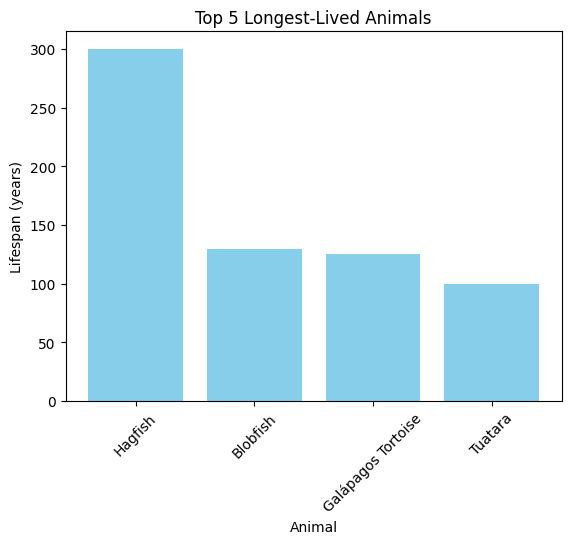

In [32]:
top5 = df.nlargest(5, "Lifespan_num")

plt.bar(top5["Animal"], top5["Lifespan_num"], color="skyblue")
plt.xlabel("Animal")
plt.ylabel("Lifespan (years)")
plt.title("Top 5 Longest-Lived Animals")
plt.xticks(rotation=45)
plt.show()

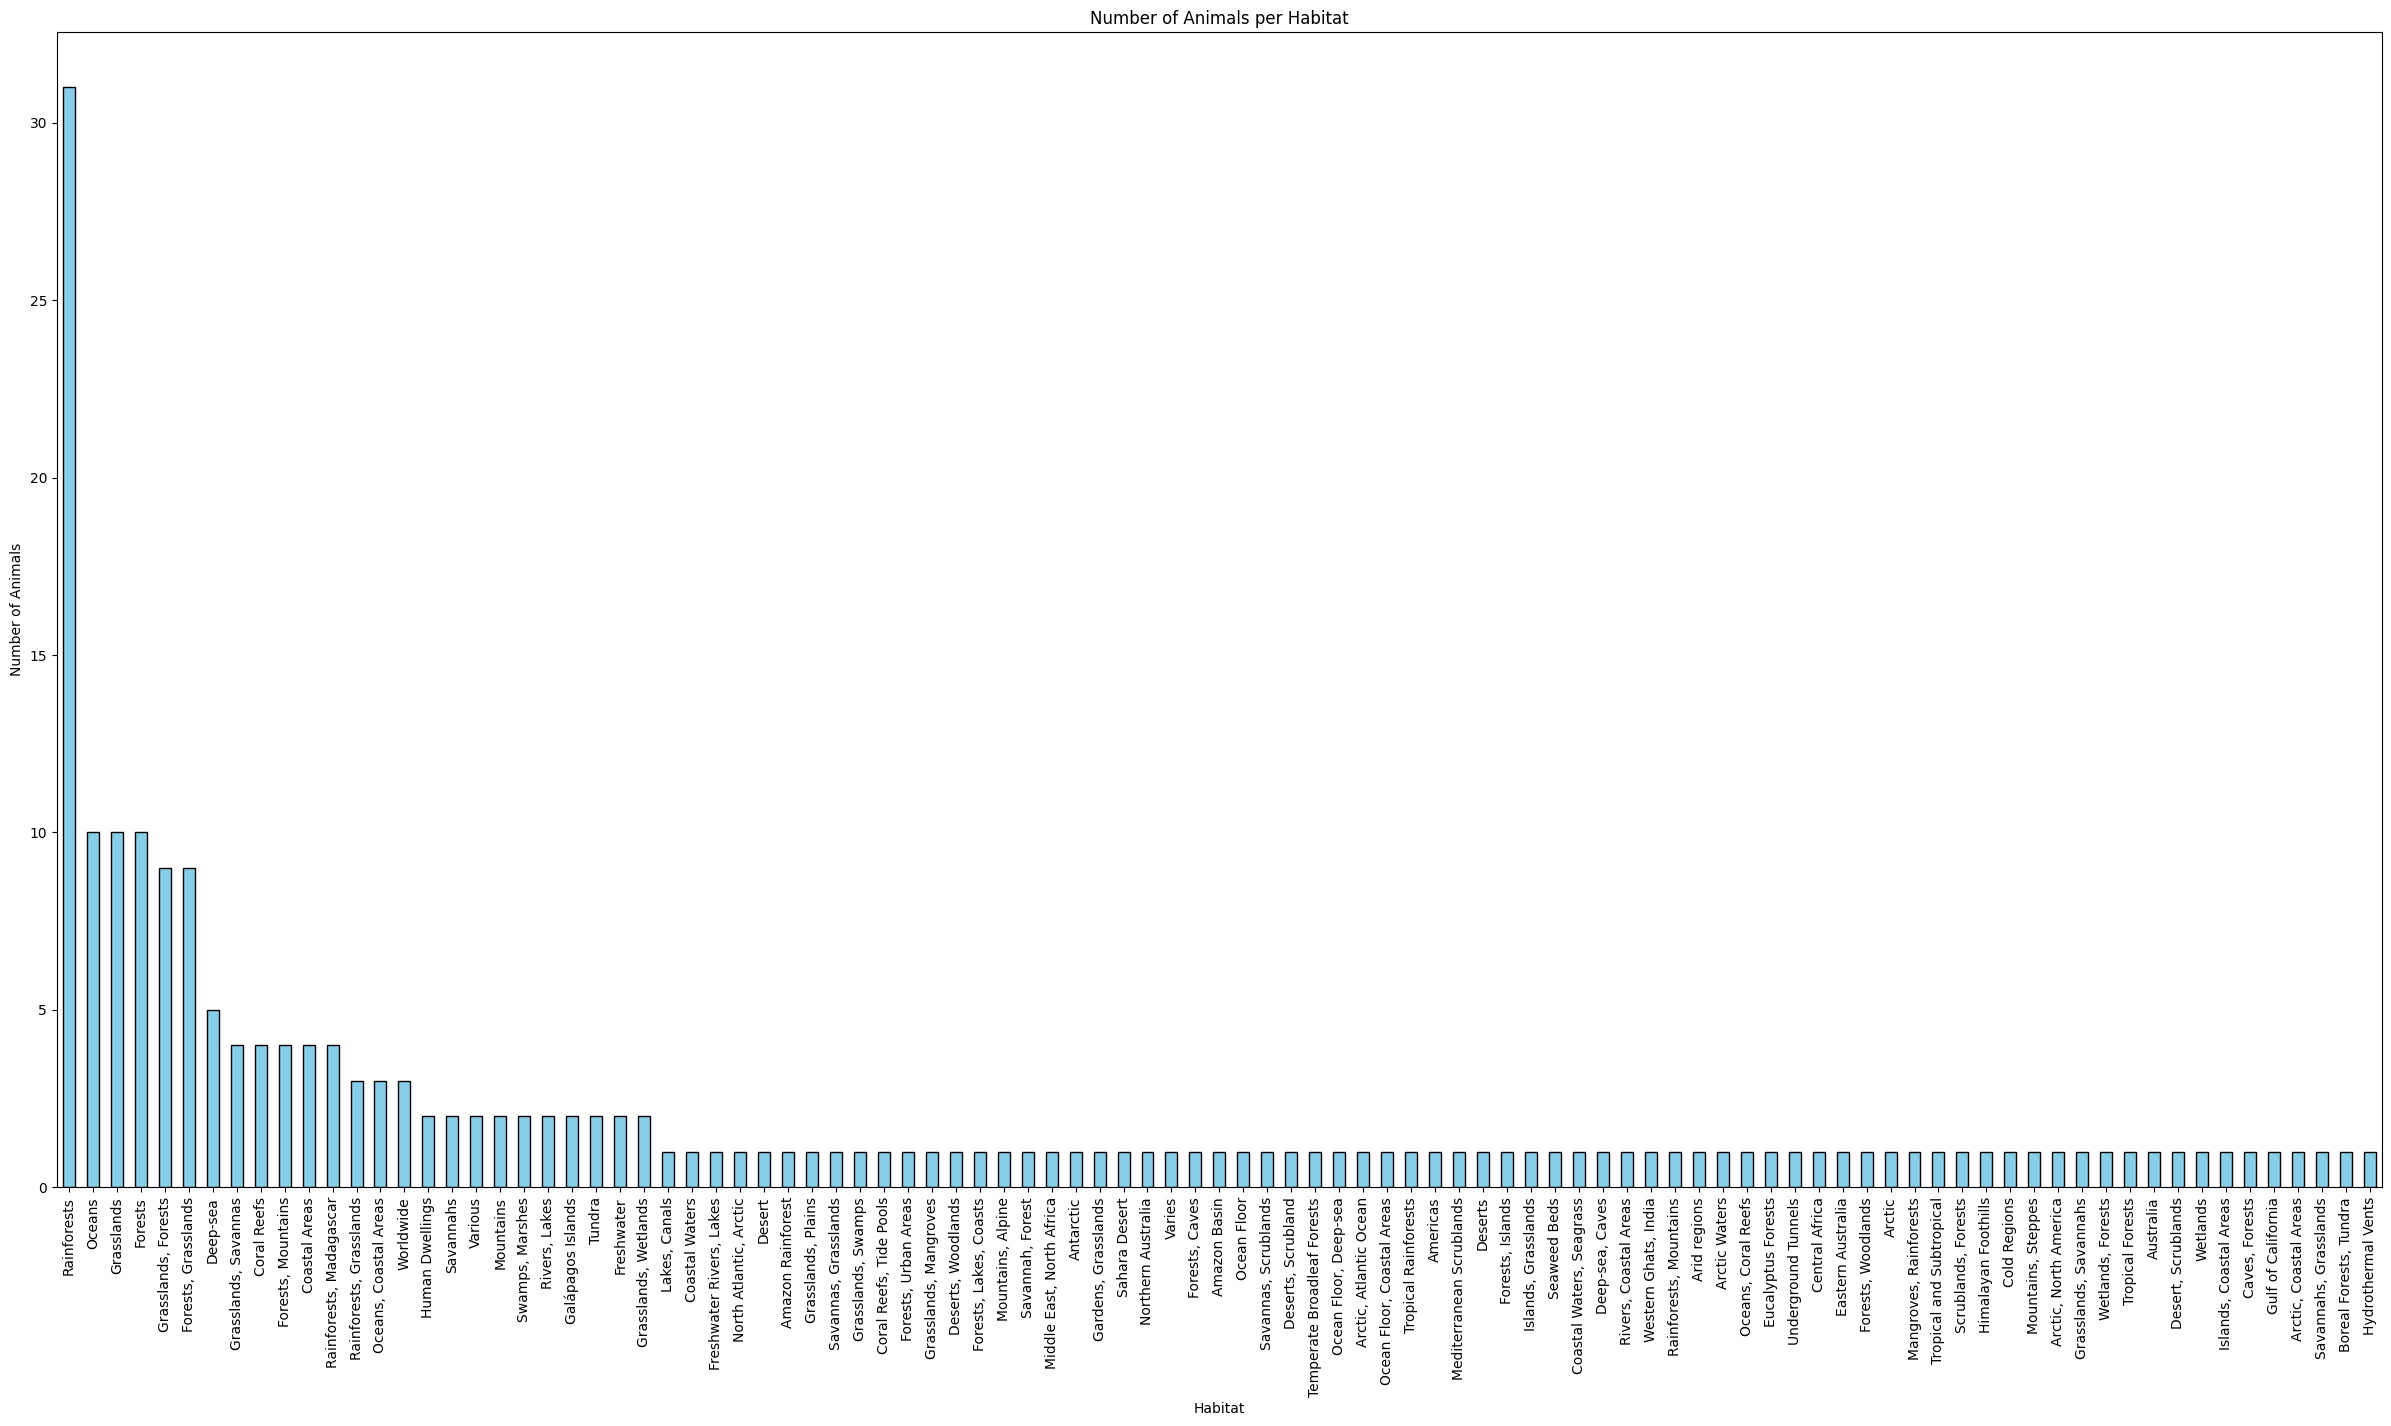

In [31]:
habitat_counts = df["Habitat"].value_counts()

# Plot bar chart
plt.figure(figsize=(30, 15))
habitat_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Number of Animals per Habitat")
plt.xlabel("Habitat")
plt.ylabel("Number of Animals")
plt.xticks(rotation=90)  # rotate labels if long
plt.show()